In [31]:
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt

import bvcopula
import utils
import marginal as mg

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
path_models = '/home/nina/models'
path_exp = '/home/nina/VRData/Processing/pkls'
beh = 5

In [125]:
animal = 'ST260'
d = {
    'ST260': 104,
    'ST262': 61,
    'ST263': 23,
    'ST264': 34
}
N_max = d[animal]
dayN = 2
day_name = f"Day{dayN}"
exp_pref = f"{animal}_{day_name}"

In [126]:
X,Y = utils.load_experimental_data(path_exp, animal, day_name, 3, 19)
order = np.argsort(X[:,0])

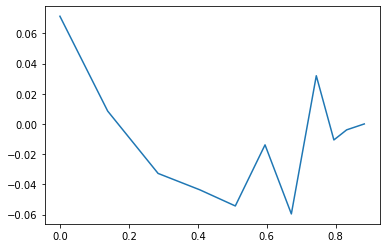

In [127]:
batch_size = 2000
shift = 2000
length = Y.shape[0]//batch_size
J = int(batch_size/shift)
p = np.zeros(length*J-(J-1))
for j in range(J):
    batches = (Y[order])[shift*j:(length-1)*batch_size+shift*j].reshape((-1,batch_size,2))
    for i,b in enumerate(batches):
        p[J*i+j] = np.corrcoef(*b.T)[0,1]
stim = X[order][:(length-1)*batch_size+1:shift]
#print(stim.shape,p.shape)
plt.plot(stim,p)

In [128]:
Hs = (-np.log(1-np.abs(p))/2/np.log(2)).mean()
p_all = np.corrcoef(*Y.T)[0,1]
H = (-np.log(1-np.abs(p_all))/2/np.log(2))
Hs-H

0.02093278276606808

In [129]:
mg.revised_mi(stim.reshape(-1,1).tolist(),p.reshape(-1,1).tolist())

-0.008010064197974842

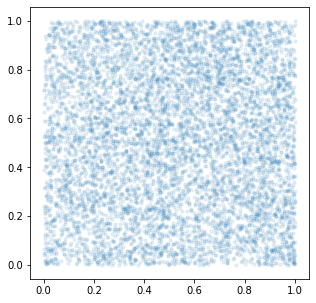

In [130]:
X,Y = utils.load_experimental_data(path_exp, animal, day_name, 3, 19)
plt.figure(figsize=(5,5))
plt.scatter(*Y[(X[:,0]>0.7)&(X[:,0]<0.9)].T,alpha=0.1,s=10)

In [131]:
from scipy.special import psi
batch_size = 2000
res = np.zeros((N_max+beh,N_max+beh))
k = 1/(2*np.log(2))
for n1 in range(-beh,N_max-1):
    for n2 in range(n1+1,N_max):
        X,Y = utils.load_experimental_data(path_exp, animal, day_name, n1, n2)
        order = np.argsort(X[:,0])
        length = Y.shape[0]//batch_size
        p = np.zeros(length)
        batches = (Y[order])[:length*batch_size].reshape((-1,batch_size,2))
        for i,b in enumerate(batches):
            p[i] = np.corrcoef(*b.T)[0,1]
        p_all = np.corrcoef(*Y[:length*batch_size].T)[0,1]
        batches = (X[order])[:length*batch_size].reshape((-1,batch_size))
        stim = batches.mean(axis=-1)
        Hs = (k*np.log(1-p**2)).mean()
        H = (k*np.log(1-p_all**2))
        res[n1+beh,n2+beh] = Hs-H
    #print(n1)

In [132]:
# r = -res.flatten()
# r1 = r
# mask = (r1>0.01) | (r2>0.01)
# plt.scatter(r1[mask],r2[mask])
# x = np.linspace(0.04,0.12,100)
# plt.plot(x,x)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 6.000e+00, 8.000e+00, 2.000e+00,
        1.000e+00, 2.000e+00, 1.000e+00, 9.000e+00, 2.000e+00, 9.000e+00,
        1.500e+01, 1.000e+01, 2.200e+01, 3.100e+01, 4.100e+01, 7.200e+01,
        1.030e+02, 1.580e+02, 2.990e+02, 8.680e+02, 4.175e+03, 4.300e+01,
        0.000e+00, 1.000e+00]),
 array([-1.70978532e-01, -1.67343662e-01, -1.63708793e-01, -1.60073924e-01,
        -1.56439054e-01, -1.52804185e-01, -1.49169315e-01, -1.45534446e-01,
        -1.41899577e-01, -1.38264707e-01, -1.34629838e-01, -1.30994968e-01,
        -1.27360099e-01, -1.23725230e-01, -1.20090360e-01, -1.16455491e-01,
        -1.12820621e-01, -1.09185752e-01, -1.05550883e-01, -1.01916013e-

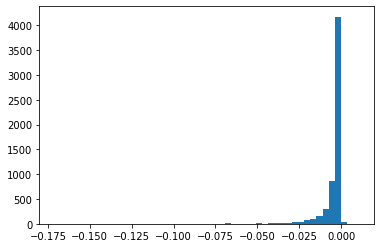

In [133]:
plt.hist(res.flatten()[res.flatten()!=0],bins=50)

In [134]:
with open(f"{path_models}/MI_measures/{exp_pref}_linearMI.pkl","wb") as f:
    pkl.dump(res,f)

In [20]:
with open(f"{path_models}/MI_measures/{exp_pref}_linearMI.pkl","rb") as f:
    data = pkl.load(f)